In [8]:
import networkx as nx
import numpy as np

In [13]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"

last_year = 2009
last_month = 1
G_init = nx.Graph()
d = {}
for year in range(2009, last_year+1):
    for month in range(1,13):
        if year == last_year and month>last_month:
            break
#         Unix time of transaction hash of transaction hash of first output address amount of first output bitcoins 
#         hash of second output address amount of second output bitcoins (additional outputs, if exist)\r\n
        with open(path +str(year)+"\\"+ 'outputs' + str(year) + '_' + str(month) + '.txt', 'r') as f:
            data = f.readlines()
            for trnx in data:
                trnx = trnx[:-1].split("\t")
                ind=0
                for i in range(2, len(trnx), 2):
                    d[(trnx[1], str(ind))] = [trnx[i], float(trnx[i+1])/10**8]
                    G_init.add_edge(trnx[1], trnx[i], weight = float(trnx[i+1])/10**8)
                    ind+=1
print(G_init.number_of_edges(), G_init.number_of_nodes())

32 35


In [14]:
# G = nx.MultiDiGraph()
for year in range(2009, last_year+1):
    for month in range(1,13):
        if year == last_year and month> last_month:
            break
        with open(path +str(year)+"\\"+ 'inputs' + str(year) + '_' + str(month) + '.txt', 'r') as f:
            data = f.readlines()
            for trnx in data:
                trnx = trnx[:-1].split("\t")
#                 print(trnx)
                in_addr_cost = []
                f=0
                for i in range(2, len(trnx), 2):
                    try:
                        in_addr_cost.append(d[(trnx[i], trnx[i+1])])
                    except:
                        f=1
                neigh = list(G_init.neighbors(trnx[1]))
                outcost = np.array([G_init[trnx[1]][v]['weight'] for v in neigh])
                if f==1:
                    if in_addr_cost == []:
                        in_addr_cost.append(['unknown', sum(outcost)])
                    else: 
                        s = sum(map(float, np.array(in_addr_cost)[:,1]))
                        in_addr_cost.append(['unknown', sum(outcost)-s])
                
                in_addr_cost = np.array(in_addr_cost).transpose()
                s = sum(map(float, list(in_addr_cost[1])))
                in_addr_cost[1] = np.array(list(map(float, in_addr_cost[1])))/s
                G_init.remove_node(trnx[1])
                for i in range(len(in_addr_cost[1])):
                    costs = float(in_addr_cost[1][0])*outcost
                    for j in range(len(neigh)):
                        if in_addr_cost[0][i]!='noaddress' and in_addr_cost[0][i] !='unknown' and neigh[j]!='noaddress' and neigh[j]!='unknown':
                            if G_init.has_edge(in_addr_cost[0][i], neigh[j]):
                                G_init[in_addr_cost[0][i]][neigh[j]]['weight'] += float(costs[j])
#                                 print(G_init[in_addr_cost[0][i]][neigh[j]]['weight'])
                            else:
                                G_init.add_edge(in_addr_cost[0][i], neigh[j], weight = float(costs[j]))
#                 print(G_init.number_of_nodes(), G_init.number_of_edges())

In [15]:
G_init.remove_node('noaddress')
# G_init.remove_node('unknown')
G_init.number_of_nodes(), G_init.number_of_edges()

(2, 0)

In [16]:
nx.write_graphml(G_init, path + "graphs_without_na_unk\\" + str(last_year) + "_" + str(last_month) + ".graphml")

In [25]:
G_init.add_node("noaddress")
"noaddress" in G_init

True

In [26]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"
nodes = [67, 105, 145, 3515, 3744, 4407, 21652, 27572, 35493, 44716, 58543, 73553,
         102375, 154531, 235040, 320660, 502030, 926342, 1408276, 1784883, 2054950, 2256466, 2443383, 2605279]
edges = [35, 59, 84, 6578, 6941, 7960, 34025, 42918, 55779, 72259, 96643, 118119, 169245, 
        252998, 400591, 582756, 972730, 1944436, 2906598, 3716491, 4436879, 4954600, 5444500, 5888648]
x = []
count = 1
for year in range(2010, 2012):
    for month in range(1,13):
#         x.append(str(year) + "_" + str(month))
        x.append(count)
        count+=1

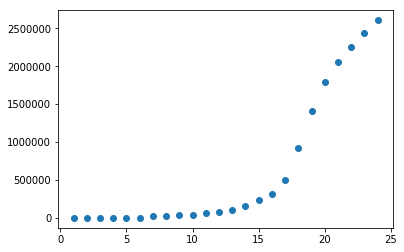

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x, nodes)

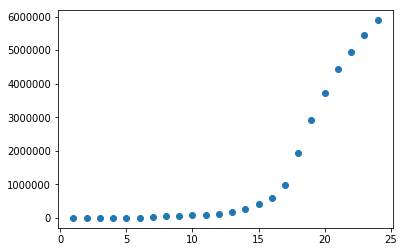

In [33]:
plt.scatter(x, edges)